# 最急降下法（gradien descent）

<a href="https://colab.research.google.com/github/takunton/ds/blob/main/work/ds_ml/web/lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## １．データ準備

In [1]:
import pandas as pd
df = pd.read_csv('data/sample_data.csv')

In [2]:
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


## ２．データ可視化

In [3]:
import seaborn as sns

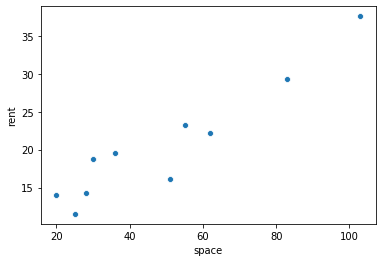

In [4]:
sns.scatterplot(x=df['space'], y=df['rent'], data=df)

## ３．損失関数

In [5]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('/work/ds_ml/udemy/Util')
import MlUtil

In [6]:
MlUtil.cost_func(x=df['space'], y=df['rent'], theta_0=5, theta_1=7)

138703.20244638805

## ４．損失関数可視化

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

### 3Dグラフ描画サンプル

In [8]:
x = np.linspace(1, 4, 4)
y = np.linspace(10, 50, 5)

# 配列の要素から格子列を生成する
X, Y = np.meshgrid(x, y)

In [9]:
from itertools import product
z = [x * y for x, y in product(x, y)]
z = np.array(z)
Z = z.reshape(len(x), len(y))

In [10]:
X

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

In [11]:
Y

array([[10., 10., 10., 10.],
       [20., 20., 20., 20.],
       [30., 30., 30., 30.],
       [40., 40., 40., 40.],
       [50., 50., 50., 50.]])

In [12]:
Z

array([[ 10.,  20.,  30.,  40.,  50.],
       [ 20.,  40.,  60.,  80., 100.],
       [ 30.,  60.,  90., 120., 150.],
       [ 40.,  80., 120., 160., 200.]])

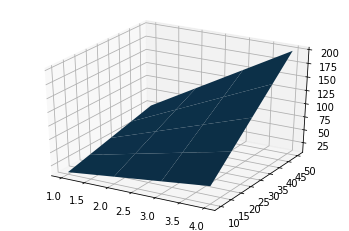

In [13]:
ax = plt.axes(projection='3d')
ax.plot_surface(X.T, Y.T, Z)

## 損失関数グラフ

In [14]:
# 軸を定義
n0 = n1 = 300
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

# 軸の値リストを生成
theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)

# 配列の要素から格子列を生成する
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)

In [15]:
# 損失関数を計算
z = [MlUtil.cost_func(x=df['space'], y=df['rent'], theta_0=param[0], theta_1=param[1]) for param in product(theta_0, theta_1)]
z = np.array(z)
Z = z.reshape(len(theta_0), len(theta_1))

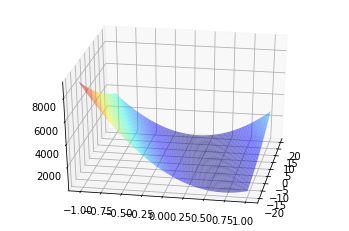

In [16]:
# 3D描画
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)

# 軸を反転
plt.gca().invert_xaxis()
# グラフ表示視点を設定
ax.view_init(elev=30, azim=10)

## ５．最急降下法

In [17]:
# 参考：ランダムで実施する方法
theta_0_init = np.random.uniform(min_0, max_0)
theta_1_init = np.random.uniform(min_1, max_1)

In [18]:
# θ1,θ2の初期値
theta_0_init = -5
theta_1_init = -0.5

# イテレーション数（一般的にエポックスと呼ぶ）
epochs = 100000

# 学習率
alpha = 0.00005

In [19]:
# θの更新履歴リスト
theta_0_hist = []
theta_1_hist = []
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

for i in range(epochs):
    new_theta_0, new_theta_1 = MlUtil.update_theta(df['space'], df['rent'], theta_0_hist[-1], theta_1_hist[-1], alpha)
    theta_0_hist.append(new_theta_0)
    theta_1_hist.append(new_theta_1)

In [20]:
theta_0_hist[-1]

5.6923135837459435

In [21]:
theta_1_hist[-1]

0.29721946485471146

## ６．結果を描画

### 損失関数の推移

In [22]:
# θごとの損失関数を計算
cost_hist = [MlUtil.cost_func(x=df['space'], y=df['rent'], theta_0=theta[0], theta_1=theta[1]) for theta in zip(theta_0_hist, theta_1_hist)]

# zip：２つの配列で同じindexをもつ要素をタプルのリストに変換
# product：２つの配列を総当たり要素をタプルのリストに変換

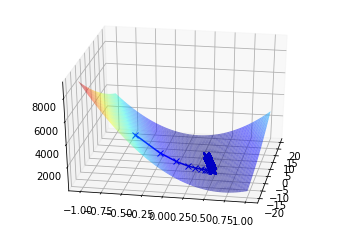

In [23]:
# グラフ描画
ax = plt.axes(projection='3d')

# 3D（θと損失関数）
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
# θの推移
ax.plot(np.array(theta_0_hist), 
        np.array(theta_1_hist),
        np.array(cost_hist),
        'bx-')

# 軸を反転
plt.gca().invert_xaxis()
# グラフ表示視点を設定
ax.view_init(elev=30, azim=10)

### 等高線

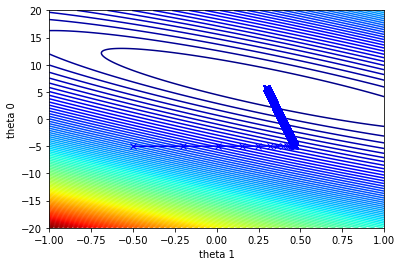

In [24]:
fig, ax = plt.subplots()
# 等高線
ax.contour(theta_1_ax, theta_0_ax, Z, levels = 100, cmap='jet')
# θの推移
ax.plot(np.array(theta_1_hist), 
        np.array(theta_0_hist),
        'bx-')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 0')
plt.show()

### 回帰直線

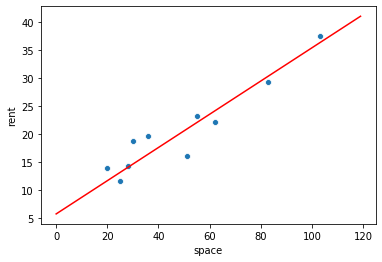

In [25]:
# 説明変数を定義
x = np.arange(120)

# 目的変数yを計算
y = theta_0_hist[-1] + theta_1_hist[-1] * x

# グラフ描画
fig, ax = plt.subplots()

# 散布図
sns.scatterplot(x=df['space'], y=df['rent'], data=df, ax=ax)
# 回帰直線
ax.plot(np.array(x), 
        np.array(y),
        'r-')
plt.show()

# 正規方程式（normal equation）

## １．Xを作成

In [26]:
# θ0用の列を付与
X = np.matrix([np.ones(len(df['space'])), df['space']])
X = X.T

In [27]:
X

matrix([[  1.,  20.],
        [  1.,  25.],
        [  1.,  28.],
        [  1.,  30.],
        [  1.,  36.],
        [  1.,  51.],
        [  1.,  55.],
        [  1.,  62.],
        [  1.,  83.],
        [  1., 103.]])

## ２．yとXを使って正規方程式でθを求める

In [28]:
y = np.matrix(df['rent'])
y = y.T

In [29]:
best_theta = (X.T * X).I * X.T * y
best_theta

matrix([[7.0962325 ],
        [0.27487161]])

## ３．最急降下法と比較する形で等高線で描画

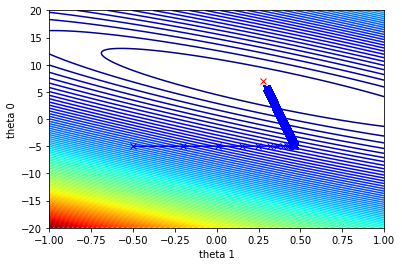

In [31]:
fig, ax = plt.subplots()
# 等高線
ax.contour(theta_1_ax, theta_0_ax, Z, levels = 100, cmap='jet')
# 最急降下法のθ推移
ax.plot(np.array(theta_1_hist), 
        np.array(theta_0_hist),
        'bx-')
ax.plot(best_theta[1][0], 
        best_theta[0][0],
        'rx-')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 0')
plt.show()

# scikit-learnで線形回帰（正規方程式）

In [65]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression()

# データの準備
x = df['space'].values
X = x.reshape(-1, 1)
y = df['rent'].values

# 学習
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
# 予測
model.predict(X)

array([12.59366469, 13.96802274, 14.79263756, 15.34238078, 16.99161044,
       21.11468458, 22.21417102, 24.13827229, 29.91057608, 35.40800827])

In [75]:
# 係数
model.coef_

array([0.27487161])

In [76]:
# 切片
model.intercept_

7.0962324999088295